# Parte 1: Classificando resultado de exames

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/breast-cancer-dataset/breast-cancer.csv


In [2]:
df = pd.read_csv('/kaggle/input/breast-cancer-dataset/breast-cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
df.shape

(569, 32)

In [4]:
df.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [5]:
df['diagnosis_maligno'] = df.diagnosis.apply(lambda x: 1 if x == 'M' else 0)
df['diagnosis_maligno'].value_counts()

0    357
1    212
Name: diagnosis_maligno, dtype: int64

## Separando treino e teste:

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'diagnosis_maligno'],
      dtype='object')

In [9]:
X = df[['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']]

y = df['diagnosis_maligno']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.1)

In [11]:
len(X_train)

460

In [12]:
len(X_test)

57

In [13]:
len(X_val)

52

## Normalizando os dados:

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
sc = StandardScaler()

In [16]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
X_val = sc.fit_transform(X_val)

In [17]:
X_train

array([[-0.63298202, -0.14087395, -0.55931185, ...,  0.64342088,
         3.10672773,  3.27392292],
       [-0.63298202, -0.08528768, -0.65882676, ..., -0.67111725,
        -0.57003546, -0.18910224],
       [ 1.47421857,  1.65873174,  1.49554758, ...,  1.01100554,
         1.30798779,  1.67083014],
       ...,
       [-0.62447381,  0.51689698, -0.6045459 , ..., -0.3885846 ,
        -0.94993462,  0.93651022],
       [ 0.3936756 ,  1.07507584,  0.50451071, ...,  1.59237375,
         0.2194941 ,  1.34906241],
       [-0.65567059,  0.53079355, -0.69131303, ..., -1.16297321,
        -0.73851248, -1.01075912]])

## Definição da arquitetura:

In [19]:
import tensorflow as tf
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [20]:
def build_model():
    model = Sequential()
    model.add(Dense(input_dim = 30, units = 10, activation = 'relu'))
    model.add(Dense(10, activation = 'relu'))
    
    model.add(Dense(1, activation = 'sigmoid'))
    
    return model

In [21]:
model = build_model()

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                310       
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 431
Trainable params: 431
Non-trainable params: 0
_________________________________________________________________


## Compilação:

In [28]:
adam = Adam(lr = 0.01)                      # 'lr' (learning rate): tamanho do passo que a Rede vai dar
model.compile(loss = 'binary_crossentropy', # Como o erro é calculado
              optimizer = adam,             # Define como vai ser a função que estima a direção da rede
              metrics = ['accuracy'])       # Imprime a acurácia de cada passo da rede

## Treinamento:

In [33]:
model.fit(x = X_train, y = y_train, validation_data = (X_val, y_val), batch_size = 16, epochs = 15)

Epoch 1/15
29/29 [==============================] - 0s 3ms/step - loss: 0.0311 - accuracy: 0.9891 - val_loss: 0.0544 - val_accuracy: 0.9615
Epoch 2/15
29/29 [==============================] - 0s 2ms/step - loss: 0.0301 - accuracy: 0.9913 - val_loss: 0.0542 - val_accuracy: 0.9615
Epoch 3/15
29/29 [==============================] - 0s 2ms/step - loss: 0.0295 - accuracy: 0.9913 - val_loss: 0.0550 - val_accuracy: 0.9615
Epoch 4/15
29/29 [==============================] - 0s 2ms/step - loss: 0.0286 - accuracy: 0.9913 - val_loss: 0.0546 - val_accuracy: 0.9615
Epoch 5/15
29/29 [==============================] - 0s 2ms/step - loss: 0.0281 - accuracy: 0.9913 - val_loss: 0.0544 - val_accuracy: 0.9615
Epoch 6/15
29/29 [==============================] - 0s 2ms/step - loss: 0.0273 - accuracy: 0.9913 - val_loss: 0.0551 - val_accuracy: 0.9615
Epoch 7/15
29/29 [==============================] - 0s 2ms/step - loss: 0.0270 - accuracy: 0.9913 - val_loss: 0.0552 - val_accuracy: 0.9615
Epoch 8/15
29/29 [==

## Avaliação:

In [34]:
y_pred = model.predict(X_test)

2/2 [==============================] - 0s 3ms/step


In [35]:
from sklearn.metrics import confusion_matrix

In [36]:
y_pred

array([[1.00000000e+00],
       [3.73411494e-05],
       [1.02306575e-01],
       [1.70683209e-03],
       [9.99999940e-01],
       [9.99276698e-01],
       [5.38039167e-05],
       [9.98976946e-01],
       [9.28454028e-06],
       [7.59509567e-05],
       [1.00000000e+00],
       [1.90103659e-04],
       [2.08966434e-01],
       [1.00000000e+00],
       [9.82753932e-01],
       [5.28768052e-09],
       [1.30085406e-04],
       [9.95366454e-01],
       [1.81122268e-05],
       [8.75074882e-04],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.33731991e-01],
       [1.00000000e+00],
       [9.99998331e-01],
       [1.00000000e+00],
       [3.46298948e-05],
       [1.00000000e+00],
       [3.97012798e-07],
       [1.32771720e-05],
       [2.15759454e-03],
       [1.17834331e-02],
       [1.00000000e+00],
       [4.10363100e-05],
       [9.99991596e-01],
       [9.47283447e-01],
       [9.99991715e-01],
       [1.38730591e-03],
       [1.03002549e-05],
       [1.00000000e+00],


In [37]:
cm = confusion_matrix(y_test, y_pred > 0.5)
cm

array([[33,  0],
       [ 2, 22]])

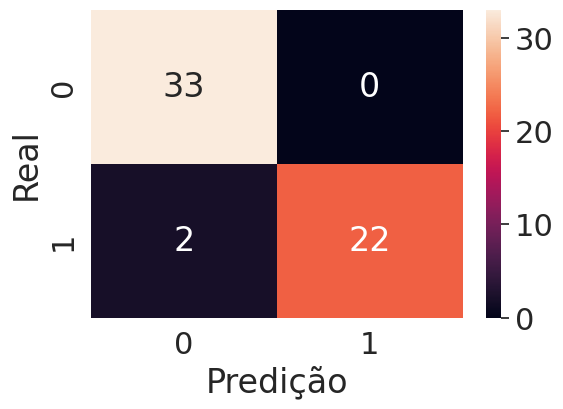

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (6, 4))
sns.set(font_scale = 2)
sns.heatmap(cm, annot =True, fmt = "d").set(xlabel = "Predição", ylabel = "Real");